# Project 12: Explanatory Data Analysis Challenge (Olympic Games)

# Project Brief for Self-Coders

Here you´ll have the opportunity to code major parts of Project 12 on your own. If you need any help or inspiration, have a look at the Videos or the Jupyter Notebook with the full code. <br> <br>
Keep in mind that it´s all about __getting the right results/conclusions__. It´s not about finding the identical code. Things can be coded in many different ways. Even if you come to the same conclusions, it´s very unlikely that we have the very same code. 

## Data Import and Inspection

Import the Datasets Summer (__summer.csv__), Winter (__winter.csv__) and dictionary (__dictionary.csv__) and Inspect! 

In [114]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as sts
sns.set()

In [2]:
summer = pd.read_csv("summer.csv")
winter = pd.read_csv("winter.csv")
dic = pd.read_csv("dictionary.csv")

In [3]:
summer.head()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver


In [4]:
summer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31165 entries, 0 to 31164
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Year        31165 non-null  int64 
 1   City        31165 non-null  object
 2   Sport       31165 non-null  object
 3   Discipline  31165 non-null  object
 4   Athlete     31165 non-null  object
 5   Country     31161 non-null  object
 6   Gender      31165 non-null  object
 7   Event       31165 non-null  object
 8   Medal       31165 non-null  object
dtypes: int64(1), object(8)
memory usage: 2.1+ MB


In [5]:
summer.describe(include='all')

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
count,31165.000000,31165,31165,31165,31165,31161,31165,31165,31165
unique,NaN,22,43,67,22762,147,2,666,3
top,NaN,London,Aquatics,Athletics,"PHELPS, Michael",USA,Men,Football,Gold
freq,NaN,3567,4170,3638,22,4585,22746,1497,10486
mean,1970.482785,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,33.158416,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1896.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,1948.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,1980.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,2000.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
winter.head(2)

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1924,Chamonix,Biathlon,Biathlon,"BERTHET, G.",FRA,Men,Military Patrol,Bronze
1,1924,Chamonix,Biathlon,Biathlon,"MANDRILLON, C.",FRA,Men,Military Patrol,Bronze


In [7]:
winter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5770 entries, 0 to 5769
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Year        5770 non-null   int64 
 1   City        5770 non-null   object
 2   Sport       5770 non-null   object
 3   Discipline  5770 non-null   object
 4   Athlete     5770 non-null   object
 5   Country     5770 non-null   object
 6   Gender      5770 non-null   object
 7   Event       5770 non-null   object
 8   Medal       5770 non-null   object
dtypes: int64(1), object(8)
memory usage: 405.8+ KB


In [8]:
winter.describe(include='all')

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
count,5770.000000,5770,5770,5770,5770,5770,5770,5770,5770
unique,NaN,19,7,15,3761,45,2,83,3
top,NaN,Sochi,Skiing,Ice Hockey,"BJOERNDALEN, Ole Einar",USA,Men,Ice Hockey,Silver
freq,NaN,612,1781,1536,13,653,3944,1536,1930
mean,1986.350433,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,24.263673,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1924.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,1972.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,1994.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,2006.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
dic.head(2)

,Country,Code,Population,GDP per Capita
0,Afghanistan,AFG,32526562.0,594.323081
1,Albania,ALB,2889167.0,3945.217582


In [10]:
dic.nunique()

Country           201
Code              201
Population        196
GDP per Capita    176
dtype: int64

In [11]:
dic[dic['Population'].isna()]

,Country,Code,Population,GDP per Capita
45,Cook Islands,COK,NaN,NaN
61,Eritrea,ERI,NaN,NaN
130,Netherlands Antilles*,AHO,NaN,NaN
139,"Palestine, Occupied Territories",PLE,NaN,NaN
177,Taiwan,TPE,NaN,NaN


## Merging and Concatenating

1. __Merge__ Summer and Winter (one row for each Medal awarded in any Olympic Games) and save the merged DataFrame in __olympics__. 
2. An __additional column__ (e.g. "Edition") shall indicate the Edition -> __Summer or Winter__.
3. Add the __full Country name__ from dictionary to olympics (e.g. France for FRA).

In [12]:
summer['season'] = 'summer'
winter['season'] = 'winter'
olympics = pd.concat([summer, winter])

In [13]:
countries_mapping = dic[['Code', 'Country']].set_index('Code').to_dict(orient='dict')['Country']
olympics['Country'] = olympics.Country.map(countries_mapping).fillna(olympics.Country)

In [14]:
olympics[olympics['Country'].isna()]

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal,season
29603,2012,London,Athletics,Athletics,Pending,NaN,Women,1500M,Gold,summer
31072,2012,London,Weightlifting,Weightlifting,Pending,NaN,Women,63KG,Gold,summer
31091,2012,London,Weightlifting,Weightlifting,Pending,NaN,Men,94KG,Silver,summer
31110,2012,London,Wrestling,Wrestling Freestyle,"KUDUKHOV, Besik",NaN,Men,Wf 60 KG,Silver,summer


In [15]:
olympics['Country'] = np.where(olympics['Athlete']=='KUDUKHOV, Besik', 'Russia', olympics['Country'])

In [16]:
olympics[olympics['Country'].isna()]

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal,season
29603,2012,London,Athletics,Athletics,Pending,NaN,Women,1500M,Gold,summer
31072,2012,London,Weightlifting,Weightlifting,Pending,NaN,Women,63KG,Gold,summer
31091,2012,London,Weightlifting,Weightlifting,Pending,NaN,Men,94KG,Silver,summer


In [20]:
olympics.columns = [i.lower().replace(' ', '_') for i in olympics.columns]
dic.columns = [i.lower().replace(' ', '_') for i in dic.columns]

## Data Cleaning

1. __Remove rows__ from olympics where the Country code is unknown. (Make sure you reset the Index -> RangeIndex)
2. Convert the column __Medal__ into an __ordered Categorical__ column ("Bronze" < "Silver" < "Gold")

In [27]:
olympics = olympics.drop(olympics[olympics['country'].isna()].index).reset_index().drop('index',axis=1)

In [30]:
olympics['medal'] = olympics.medal.astype('category')
olympics.medal.cat.set_categories(["Bronze", "Silver", "Gold"], ordered = True, inplace = True)

C:\Users\kosar\AppData\Roaming\Python\Python310\site-packages\pandas\core\arrays\categorical.py:2747: FutureWarning: The `inplace` parameter in pandas.Categorical.set_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  res = method(*args, **kwargs)


In [33]:
olympics[olympics['country'].apply(len) == 3]['country'].unique()

array(['ZZX', 'BOH', 'ANZ', 'RU1', 'TCH', 'YUG', 'ROU', 'URS', 'EUA',
       'BWI', 'GDR', 'FRG', 'EUN', 'IOP', 'SRB', 'TTO', 'MNE', 'SGP'],
      dtype=object)

In [34]:
missing_countries = {'URS': 'Soviet Union', 'GDR': 'East Germany', 'ROU': 'Romania', 'FRG': 'West Germany',
                     'TCH': 'Czechoslovakia', 'YUG': 'Yugoslavia', 'EUN': 'Unified Team', 'EUA': 'Unified Team of Germany',
                     'ZZX': 'Mixed teams', 'SRB': 'Serbia', 'ANZ': 'Australasia', 'RU1': 'Russian Empire', 'MNE': 'Montenegro',
                     'TTO': 'Trinidad and Tobago', 'BOH': 'Bohemia', 'BWI': 'West Indies Federation', 'SGP': 'Singapore',
                     'IOP': 'Independent Olympic Participants'}
olympics['country'] = olympics.country.map(missing_countries).fillna(olympics.country)

## What are the most successful countries of all times?

For the next questions, use Seaborn plots.
1. What are the __Top 10__ Countries by __total medals__?
2. __Split__ the total medals of Top 10 Countries into __Summer / Winter__. Are there typical Summer/Winter Games Countries? 
3. __Split__ the total medals of Top 10 Countries into __Gold, Silver, Bronze__. 

In [44]:
top_10_medals = (olympics[['country', 'medal']]
                 .groupby('country', as_index=False)
                 .count()
                 .sort_values(by='medal', ascending=False)
                 .head(10))

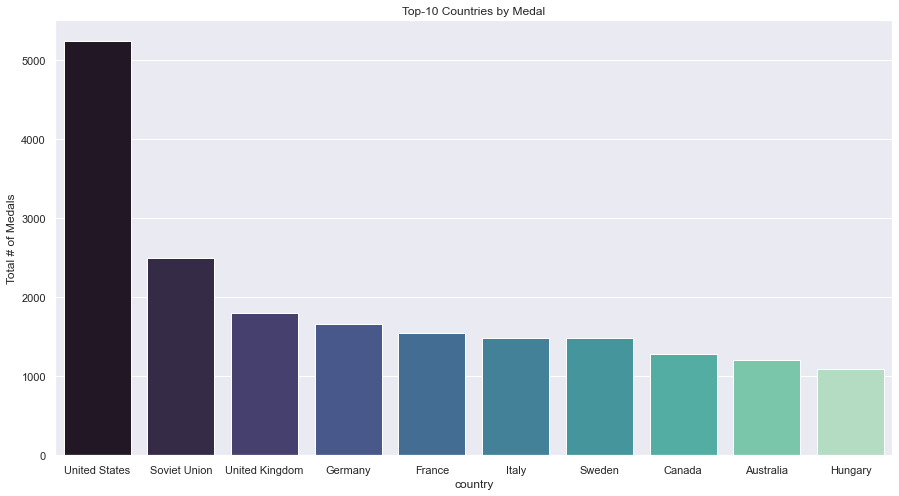

In [48]:
plt.figure(figsize=(15,8))
sns.barplot(x='country', y='medal', data=top_10_medals, palette='mako')
plt.ylabel('Total # of Medals')
plt.title('Top-10 Countries by Medal')
plt.show()

In [49]:
top_10_summer = (olympics[olympics['season'] == 'summer'][['country', 'medal']]
                 .groupby('country', as_index=False)
                 .count()
                 .sort_values(by='medal', ascending=False)
                 .head(10))
top_10_winter = (olympics[olympics['season'] == 'winter'][['country', 'medal']]
                 .groupby('country', as_index=False)
                 .count()
                 .sort_values(by='medal', ascending=False)
                 .head(10))

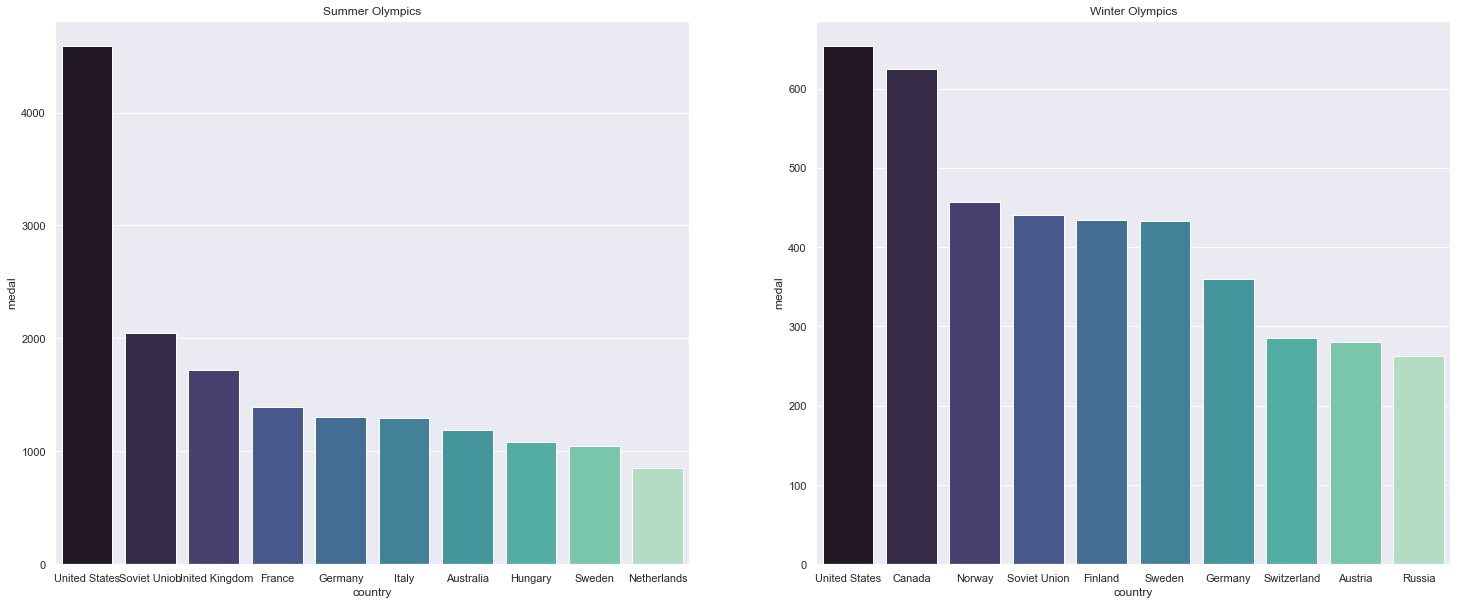

In [71]:
fig, axs = plt.subplots(1, 2)
fig.set_size_inches(25, 10)
sns.barplot(x='country', y='medal', data=top_10_summer, palette='mako', ax=axs[0])
sns.barplot(x='country', y='medal', data=top_10_winter, palette='mako', ax=axs[1])
axs[0].set_title('Summer Olympics')
axs[1].set_title('Winter Olympics')
plt.show()

In [72]:
top_10_gold = (olympics[olympics['medal'] == 'Gold'][['country', 'medal']]
               .groupby('country', as_index=False)
               .count()
               .sort_values(by='medal', ascending=False)
               .head(10))
top_10_silver = (olympics[olympics['medal'] == 'Silver'][['country', 'medal']]
               .groupby('country', as_index=False)
               .count()
               .sort_values(by='medal', ascending=False)
               .head(10))
top_10_bronze = (olympics[olympics['medal'] == 'Bronze'][['country', 'medal']]
               .groupby('country', as_index=False)
               .count()
               .sort_values(by='medal', ascending=False)
               .head(10))

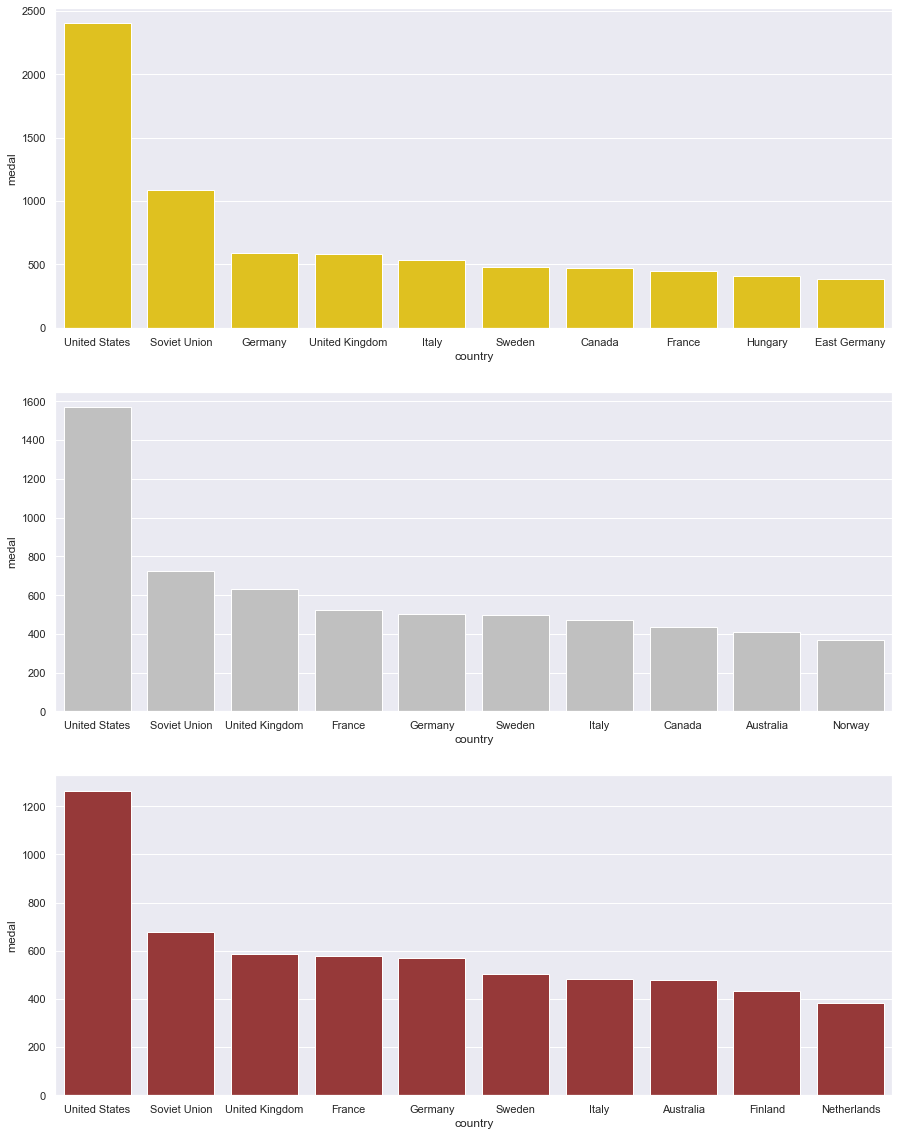

In [81]:
fig, axs = plt.subplots(3, 1)
fig.set_size_inches(15, 20)
sns.barplot(x='country', y='medal', data=top_10_gold, color='gold', ax=axs[0])
sns.barplot(x='country', y='medal', data=top_10_silver, color='silver', ax=axs[1])
sns.barplot(x='country', y='medal', data=top_10_bronze, color='brown', ax=axs[2])
plt.show()

## Do GDP, Population and Politics matter?

1. Create the following __aggregated and merged__ DataFrame with __Top 50 Countries__ (you can see an excerpt with the first 12 Countries). The Column __Total_Games__ shows the __number of Participations__ (as an approximation: determine the number of Editions where Countries have won at least one medal).

In [87]:
pop_gdp_mapping = dic[['country', 'population', 'gdp_per_capita']].set_index('country').to_dict()

In [93]:
top_50_total = (pd.crosstab(olympics.country, olympics.medal, margins=True, margins_name='total')
               .sort_values('total', ascending=False).head(51).drop('total'))
top_50_total['population'] = top_50_total.index.map(pop_gdp_mapping['population'])
top_50_total['gdp'] = top_50_total.index.map(pop_gdp_mapping['gdp_per_capita'])

In [99]:
total_games = olympics[['country', 'year', 'season']].drop_duplicates()['country'].value_counts().to_dict()
top_50_total['total_games'] = top_50_total.index.map(total_games)

In [103]:
top_50_total.head()

medal,Bronze,Silver,Gold,total,population,gdp,total_games
country,,,,,,,
United States,1265,1571,2402,5238,321418820.0,56115.718426,48
Soviet Union,677,724,1088,2489,NaN,NaN,18
United Kingdom,587,632,580,1799,65138232.0,43875.969614,42
Germany,572,504,589,1665,81413145.0,41313.313995,25
France,578,526,444,1548,66808385.0,36205.568102,47


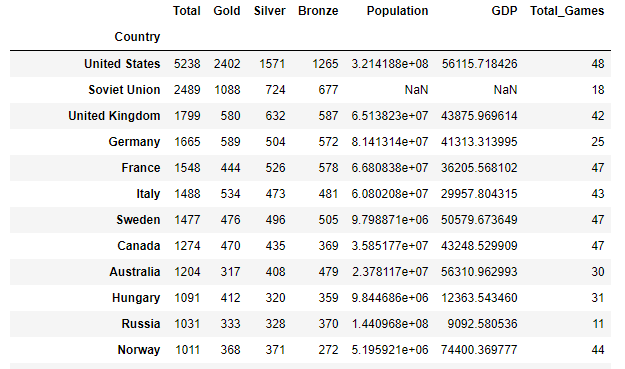

2. __Convert__ the __absolute values__ in the DataFrame into __ranks__ and save the ranks DataFrame in new variable (see screenshot). Ranks are more meaningful than absolute numbers.

In [109]:
top_50_ranks = top_50_total.rank(axis=0, ascending=False)

In [110]:
top_50_ranks.head()

medal,Bronze,Silver,Gold,total,population,gdp,total_games
country,,,,,,,
United States,1.0,1.0,1.0,1.0,3.0,4.0,1.0
Soviet Union,2.0,2.0,2.0,2.0,NaN,NaN,28.0
United Kingdom,3.0,3.0,4.0,3.0,14.0,8.0,10.0
Germany,5.0,5.0,3.0,4.0,10.0,12.0,19.0
France,4.0,4.0,8.0,5.0,13.0,15.0,3.0


## Statistical Analysis and Hypothesis Testing with scipy

In the follwing work with __Ranks__!
Check whether __GDP__ (Standard of Living), __Total_Games__ (Political Stability measure) and __Population__ (Size) have an effect on __Total Medals__.

In [136]:
all_countries = (pd.crosstab(olympics.country, olympics.medal, margins=True, margins_name='total')
                 .sort_values('total', ascending=False).drop('total'))
all_countries['population'] = all_countries.index.map(pop_gdp_mapping['population'])
all_countries['gdp'] = all_countries.index.map(pop_gdp_mapping['gdp_per_capita'])
all_countries['total_games'] = all_countries.index.map(total_games)

In [142]:
#Spearman rank correlation
all_countries.reset_index().corr('spearman')['total'].drop(['total', 'Bronze', 'Gold', 'Silver'])

medal
population     0.419755
gdp            0.458478
total_games    0.927611
Name: total, dtype: float64

In [143]:
medal_ranks = all_countries.drop(['Bronze', 'Silver', 'Gold'], axis=1)

##### 1. H0: There is no relationship between Total Medals and Population

In [144]:
r, p_value = sts.spearmanr(medal_ranks.total, medal_ranks.population, nan_policy = "omit")

In [145]:
r

0.41975527887063924

In [146]:
round(p_value, 3)

0.0

##### Reject H0, as there is a positive relationship between Total Medals and Population

##### 2. H0: There is no relationship between Total Medals and GDP per Capita

In [156]:
r, p_value = sts.spearmanr(medal_ranks.total, medal_ranks.gdp, nan_policy = "omit")

In [157]:
r

0.45847787983426685

In [158]:
round(p_value, 3)

0.0

##### Reject H0, as there is a positive relationship between Total Medals and GDP

##### 3. H0: There is no relationship between Total Medals and Participations

In [159]:
r, p_value = sts.spearmanr(medal_ranks.total, medal_ranks.total_games, nan_policy = "omit")

In [160]:
r

0.9276106841243015

In [161]:
round(p_value, 3)

0.0

##### Reject H0, as there is a significant relationship between Total Medals and Participations